In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [59]:
""" 
Araba veri seti üzerinde Random forest, destek vektör makineleri, naive bayes sınıflandırıclarını uyguladım

veri setinde etki eden özellikleri büyükten küçüğe sıraladım

Not:
Vhigh: çok yüksek
High:yüksek
Med: orta
Low: düşük
5more: 5ten fazla
Small: küçük
Big :büyük
Unacc: uygun değil
Acc:uygun
Good: iyi
Vgood:çok iyi

"""

' Not:\nVhigh: çok yüksek\nHigh:yüksek\nMed: orta\nLow: düşük\n5more: 5ten fazla\nSmall: küçük\nBig :büyük\nUnacc: uygun değil\nAcc:uygun\nGood: iyi\nVgood:çok iyi\n\n'

In [2]:
data = pd.read_excel("araba.xlsx")

In [3]:
data

,Ücret,Bakım,KapıSayısı,KişiSayısı,Bagaj,Güvenlik,Sınıf
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
data['Sınıf']    =  le.fit_transform(data['Sınıf'])
data['Ücret']    =  le.fit_transform(data['Ücret'])
data['Bakım']    =  le.fit_transform(data['Bakım'])
data['Bagaj']    =  le.fit_transform(data['Bagaj'])
data['Güvenlik'] =  le.fit_transform(data['Güvenlik'])   # verilerin sayısallaştırılması

In [5]:
data =  data.replace("5more", 6)  #kapı sayısı
data =  data.replace("more",5)    # kişi sayısı

In [6]:
data.head()

,Ücret,Bakım,KapıSayısı,KişiSayısı,Bagaj,Güvenlik,Sınıf
0,3,3,2,2,2,1,2
1,3,3,2,2,2,2,2
2,3,3,2,2,2,0,2
3,3,3,2,2,1,1,2
4,3,3,2,2,1,2,2


In [7]:
data.describe()

,Ücret,Bakım,KapıSayısı,KişiSayısı,Bagaj,Güvenlik,Sınıf
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,3.750000,3.666667,1.000000,1.000000,1.553241
std,1.118358,1.118358,1.479448,1.247580,0.816733,0.816733,0.875948
min,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,2.750000,2.000000,0.000000,0.000000,1.000000
50%,1.500000,1.500000,3.500000,4.000000,1.000000,1.000000,2.000000
75%,2.250000,2.250000,4.500000,5.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,6.000000,5.000000,2.000000,2.000000,3.000000


In [8]:
# test ve eğitim verisi olarak ayırma
from sklearn.model_selection import train_test_split
X=data[['Ücret', 'Bakım', 'KapıSayısı', 'KişiSayısı','Bagaj','Güvenlik']]
y=data['Sınıf'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [9]:
#random forest en iyi sonucu verdi
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9855491329479769


In [10]:
ozellik = pd.Series(clf.feature_importances_,index = [['Ücret', 'Bakım', 'KapıSayısı', 'KişiSayısı','Bagaj','Güvenlik']]).sort_values(ascending=False)
ozellik   # özellik seçiminin büyükten küçüğe sıralanması

Güvenlik      0.287145
KişiSayısı    0.221458
Ücret         0.188621
Bakım         0.156606
Bagaj         0.079915
KapıSayısı    0.066254
dtype: float64

No handles with labels found to put in legend.


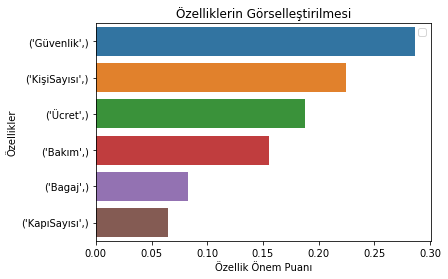

In [20]:
# özelliklerin görselleştirilmesi

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=ozellik, y=ozellik.index)
plt.xlabel('Özellik Önem Puanı')
plt.ylabel('Özellikler')
plt.title("Özelliklerin Görselleştirilmesi")
plt.legend()
plt.show()

In [11]:
# Destek vektör makinesi 
from sklearn import svm

clf = svm.SVC(kernel='linear')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6965317919075145


In [12]:
# naive bayes

X=data[['Ücret', 'Bakım', 'KapıSayısı', 'KişiSayısı','Bagaj','Güvenlik']] 
y=data['Sınıf']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6907514450867052
